In [68]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
import visualkeras as vk
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.models import Sequential

In [69]:
train = pd.read_csv('/content/emnist-balanced-train.csv')
test = pd.read_csv('/content/emnist-balanced-test.csv')

In [70]:
train = train.iloc[:-1, :]
test = test.iloc[:-1, :]

In [71]:
train_labels = train.iloc[:, 0]
train_images = train.iloc[:, 1:]

test_labels = test.iloc[:, 0]
test_images = test.iloc[:, 1:]

In [72]:
train_labels = np.asarray(train_labels)
train_images = np.asarray(train_images)

test_labels = np.asarray(test_labels)
test_images = np.asarray(test_images)

In [73]:
print(f"train --> {np.min(train_images)}\t{np.max(train_images)}\ntest --> {np.min(test_images)}\t{np.max(test_images)}")

train --> 0.0	255.0
test --> 0.0	255.0


In [74]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [75]:
print(f"train --> {np.min(train_images)}\t{np.max(train_images)}\ntest --> {np.min(test_images)}\t{np.max(test_images)}")

train --> 0.0	1.0
test --> 0.0	1.0


In [76]:
to_char = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f', 16: 'g', 17: 'h', 18: 'i', 19: 'j',
    20: 'k', 21: 'l', 22: 'm', 23: 'n', 24: 'o', 25: 'p', 26: 'q', 27: 'r', 28: 's', 29: 't',
    30: 'u', 31: 'v', 32: 'w', 33: 'x', 34: 'y', 35: 'z',
    36: 'A', 37: 'B', 38: 'C', 39: 'D', 40: 'E', 41: 'F', 42: 'G', 43: 'H', 44: 'I', 45: 'J',
    46: 'K', 47: 'L', 48: 'M', 49: 'N', 50: 'O', 51: 'P', 52: 'Q', 53: 'R', 54: 'S', 55: 'T',
    56: 'U', 57: 'V', 58: 'W', 59: 'X', 60: 'Y', 61: 'Z'
}

In [77]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [78]:
train_images.shape

(13521, 28, 28, 1)

In [79]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=62)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=62)

In [80]:
def create_model():
  model = Sequential()

  model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (5, 5), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2, 2))
  model.add(Dropout(0.25))

  model.add(BatchNormalization())
  model.add(Flatten())

  model.add(Dense(256, activation='relu'))
  model.add(Dense(len(to_char), activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_12 (Ba  (None, 24, 24, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 batch_normalization_13 (Ba  (None, 20, 20, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                      

## Test ACCURACY ---> 81.13%

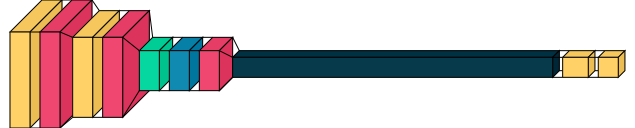

In [81]:
vk.layered_view(model)

In [82]:
best_loss_checkpoint = ModelCheckpoint(
    filepath="/content/best_loss_model.h5",
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath="/content/best_val_loss_model.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

In [83]:
history = model.fit(train_images, train_labels_one_hot, validation_split=0.2, epochs=10, batch_size=100, callbacks=[best_loss_checkpoint, best_val_loss_checkpoint])

Epoch 1/10
109/109 [==============================] - 36s 313ms/step - loss: 1.3149 - accuracy: 0.6263 - val_loss: 4.9275 - val_accuracy: 0.0425
Epoch 2/10
109/109 [==============================] - 39s 361ms/step - loss: 0.5678 - accuracy: 0.8166 - val_loss: 6.1079 - val_accuracy: 0.0370
Epoch 3/10
109/109 [==============================] - 35s 323ms/step - loss: 0.3760 - accuracy: 0.8709 - val_loss: 6.4062 - val_accuracy: 0.0344
Epoch 4/10
109/109 [==============================] - 35s 319ms/step - loss: 0.2794 - accuracy: 0.8979 - val_loss: 2.5833 - val_accuracy: 0.2695
Epoch 5/10
109/109 [==============================] - 33s 302ms/step - loss: 0.1979 - accuracy: 0.9286 - val_loss: 1.0323 - val_accuracy: 0.6898
Epoch 6/10
109/109 [==============================] - 34s 310ms/step - loss: 0.1593 - accuracy: 0.9421 - val_loss: 0.7385 - val_accuracy: 0.7797
Epoch 7/10
109/109 [==============================] - 34s 311ms/step - loss: 0.1299 - accuracy: 0.9505 - val_loss: 0.7530 - val_ac

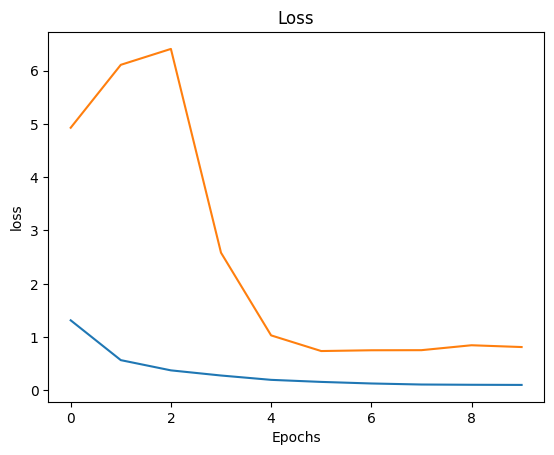

In [84]:
plt.plot(range(10), history.history['loss'])
plt.plot(range(10), history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.show()

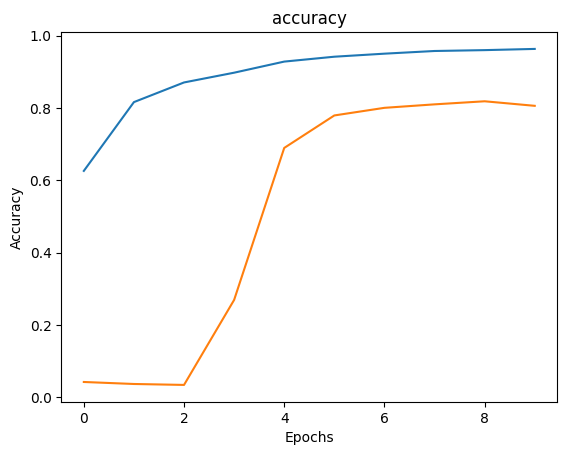

In [85]:
plt.plot(range(10), history.history['accuracy'])
plt.plot(range(10), history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('accuracy')
plt.show()

In [86]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot, verbose=2)
print(f"test loss : {test_loss}\ntest accuracy : {test_accuracy}")

423/423 - 11s - loss: 0.7689 - accuracy: 0.8113 - 11s/epoch - 25ms/step
test loss : 0.768894612789154
test accuracy : 0.8113165497779846


## Test Accuracy ---> 79.18%

In [87]:
model_2 = create_model()
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_15 (Ba  (None, 24, 24, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 32)        25632     
                                                                 
 batch_normalization_16 (Ba  (None, 20, 20, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                      

In [88]:
best_loss_checkpoint_2 = ModelCheckpoint(
    filepath="/content/best_loss_model_2.h5",
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint_2 = ModelCheckpoint(
    filepath="/content/best_val_loss_model_2.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

In [89]:
history_2 = model_2.fit(train_images, train_labels_one_hot, validation_split=0.2, epochs=20, batch_size=100, callbacks=[best_loss_checkpoint_2, best_val_loss_checkpoint_2])

Epoch 1/20
109/109 [==============================] - 36s 318ms/step - loss: 1.3284 - accuracy: 0.6330 - val_loss: 5.3850 - val_accuracy: 0.0292
Epoch 2/20
109/109 [==============================] - 34s 315ms/step - loss: 0.5549 - accuracy: 0.8207 - val_loss: 8.2873 - val_accuracy: 0.0288
Epoch 3/20
109/109 [==============================] - 35s 322ms/step - loss: 0.3871 - accuracy: 0.8656 - val_loss: 7.3950 - val_accuracy: 0.0303
Epoch 4/20
109/109 [==============================] - 34s 314ms/step - loss: 0.2814 - accuracy: 0.8994 - val_loss: 4.1045 - val_accuracy: 0.1316
Epoch 5/20
109/109 [==============================] - 36s 334ms/step - loss: 0.2186 - accuracy: 0.9185 - val_loss: 1.7635 - val_accuracy: 0.4983
Epoch 6/20
109/109 [==============================] - 35s 322ms/step - loss: 0.1610 - accuracy: 0.9419 - val_loss: 0.8334 - val_accuracy: 0.7457
Epoch 7/20
109/109 [==============================] - 35s 326ms/step - loss: 0.1326 - accuracy: 0.9521 - val_loss: 0.6712 - val_ac

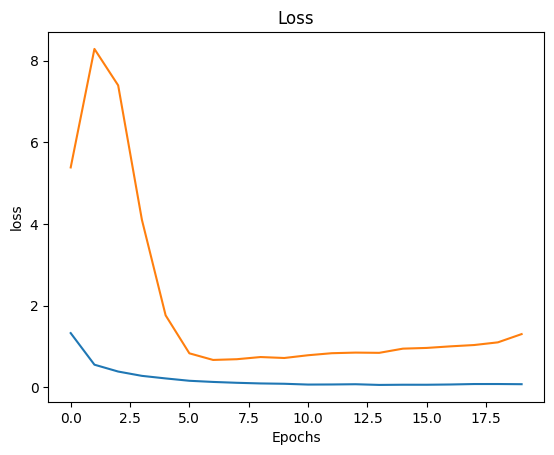

In [90]:
plt.plot(range(20), history_2.history['loss'])
plt.plot(range(20), history_2.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.show()

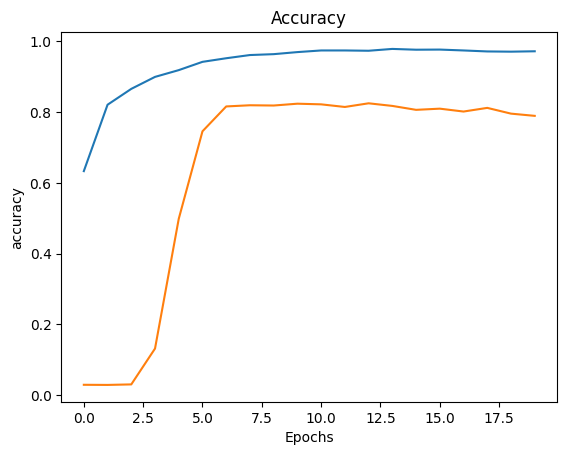

In [91]:
plt.plot(range(20), history_2.history['accuracy'])
plt.plot(range(20), history_2.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.show()

In [92]:
test_loss_2, test_accuracy_2 = model_2.evaluate(test_images, test_labels_one_hot, verbose=2)
print(f"test loss : {test_loss_2}\ntest accuracy : {test_accuracy_2}")

423/423 - 11s - loss: 1.2975 - accuracy: 0.7919 - 11s/epoch - 26ms/step
test loss : 1.2974815368652344
test accuracy : 0.7918639183044434
